In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data exploration

In [2]:
#master file
df1 = pd.read_csv('~/Downloads/udai/master_file.csv')
df1.head()

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36
1,6156216,TR6156216,202004,TR,FRONT,1,9.891305,NaN,-0.776529,0.013158,0.46,2.291656,4
2,2669722,IG2669722,201847,IG,FRONT,0,3.934955,NaN,6.104793,0.674576,448.00,1.369900,47
3,2669722,IG2669722,201848,IG,FRONT,0,3.975193,Good Friday,5.963579,0.633898,389.00,1.380073,48
4,2669722,IG2669722,201849,IG,FRONT,0,3.490547,NaN,6.817831,0.823729,914.00,1.250058,49


In [3]:
df2 = pd.read_csv('~/Downloads/udai/cross_effects_table_TRUNCATED.csv')
df2.head()

/home/issa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GROUP_ID,YEAR_WK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,BANNER_NAME,ITEM_NO
0,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_01,1.075020,TR,4907644.0
1,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_02,0.916291,TR,4907644.0
2,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_03,0.000000,TR,4907644.0
3,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_04,1.341123,TR,4907644.0
4,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_05,0.733477,TR,4907644.0


In [4]:
df3 = pd.read_csv('~/Downloads/udai/dim_table.csv')
df3.head()

,ITEM_NO,LVL4_NAME
0,5840385,Hot Beverages
1,2450712,Waste Bags
2,6532706,Pasta Sauce and Toppings
3,3111313,Fresh Chicken / Fowl
4,6460516,Waste Bags


LVL4_NAME is the category in which it contains many item

In [5]:
df3.query("LVL4_NAME=='Hot Beverages'").head()

,ITEM_NO,LVL4_NAME
0,5840385,Hot Beverages
17,6990886,Hot Beverages
26,1619671,Hot Beverages
35,3882553,Hot Beverages
42,2216812,Hot Beverages


In [6]:
#print unique category 21
df3.LVL4_NAME.unique()

array(['Hot Beverages', 'Waste Bags', 'Pasta Sauce and Toppings',
       'Fresh Chicken / Fowl', 'Soup', 'Eggs', 'Ice Cream',
       'Canned Vegetables', 'Cookies', 'Craft Beer', 'Baking Flour',
       'Frsh Bf Grnds', 'Bathroom Tissue', 'Milk', 'Cleaners',
       'Frozen Pizza', 'Books', 'Dairy Cheese', 'Yogurt', 'Salted Snacks',
       'Dry Pasta'], dtype=object)

In [7]:
#print number of records in each dataset
print("master file # record=",df1.shape[0], '\t','cross effect # records=', df2.shape[0], '\t','category # records=',df3.shape[0])

master file # record= 113886 	 cross effect # records= 163832 	 category # records= 484


In [8]:
#print unique Item NO
print( len(df1.ITEM_NO.unique()) )

484


In [9]:
#check missing val
print(df1.notna().sum())
print("================")
print(df2.notna().sum())
print("================")
print(df3.notna().sum())

ITEM_NO              113886
GROUP_ID             113886
YEAR_WK              113886
BANNER_NAME          113886
POSITION_ON_FLYER    113886
KG_FLAG              113886
NET_PRICE            113886
HOLIDAY               31616
LOG_UNITS            113886
DISTRIBUTION         113886
UNITS_WEIGHT_SOLD    113886
LOG_NET_PRICE        113886
WEEK                 113886
dtype: int64
GROUP_ID                  98380
YEAR_WK                   98380
CROSS_EFFECT_TYPE         98380
CROSS_EFFECT_LOG_PRICE    98380
BANNER_NAME               98380
ITEM_NO                   98380
dtype: int64
ITEM_NO      484
LVL4_NAME    484
dtype: int64


In [10]:
data1 = pd.merge(df1, df3, how='left', on='ITEM_NO')
#['YEAR_WK', 'BANNER_NAME', 'ITEM_NO']
data2 = pd.merge(df2, df3, how='left', on='ITEM_NO')

In [11]:
data1.head(2)

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,LVL4_NAME
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds
1,6156216,TR6156216,202004,TR,FRONT,1,9.891305,NaN,-0.776529,0.013158,0.46,2.291656,4,Frsh Bf Grnds


In [12]:
data2.head(2)

,GROUP_ID,YEAR_WK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,BANNER_NAME,ITEM_NO,LVL4_NAME
0,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_01,1.075020,TR,4907644.0,Canned Vegetables
1,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_02,0.916291,TR,4907644.0,Canned Vegetables


In [13]:
data3 = pd.merge(data1, data2, how='left', on=['YEAR_WK', 'BANNER_NAME', 'ITEM_NO', 'GROUP_ID'])
#data3[data3['ITEM_NO']==4907644]
data3.head(2)

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,LVL4_NAME_x,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,LVL4_NAME_y
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_01,0.0,Frsh Bf Grnds
1,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_02,0.0,Frsh Bf Grnds


In [14]:
summ_table = data1.groupby(by="LVL4_NAME").agg(FREQ=("ITEM_NO","count"),TOTAL_UNITS=("LOG_UNITS","sum"))
summ_table.head()
#.reset_index()
#.sort_values(by="TOTAL_UNITS", ascending=False).reset_index()
#freq_table['PCT'] = (freq_table['FREQ']/freq_table['FREQ'].sum())*100
#freq_table['CUM_PCT'] = round(freq_table['PCT'].cumsum(), 2)
#freq_table['FREQ_CUM_PCT'] = round((freq_table['FREQ'].cumsum()/freq_table['FREQ'].sum())*100,2)
#freq_table['UNITS_CUM_PCT'] = round((freq_table['TOTAL_UNITS'].cumsum()/freq_table['TOTAL_UNITS'].sum())*100,2)
#summ_table = pd.merge(summ_table, df3, how='left', on="ITEM_NO")
#summ_table.sort_values(by='FREQ', ascending=False).head()

,FREQ,TOTAL_UNITS
LVL4_NAME,,
Baking Flour,5083,19892.102209
Bathroom Tissue,5341,22518.841207
Books,1384,2503.984751
Canned Vegetables,6229,27888.899045
Cleaners,4952,17568.431168


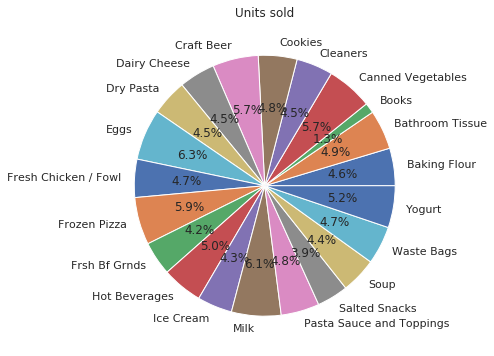

In [15]:
summ_table.plot.pie(y='FREQ', legend=False, autopct='%1.1f%%', label='', title='Units sold', figsize=(20, 6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

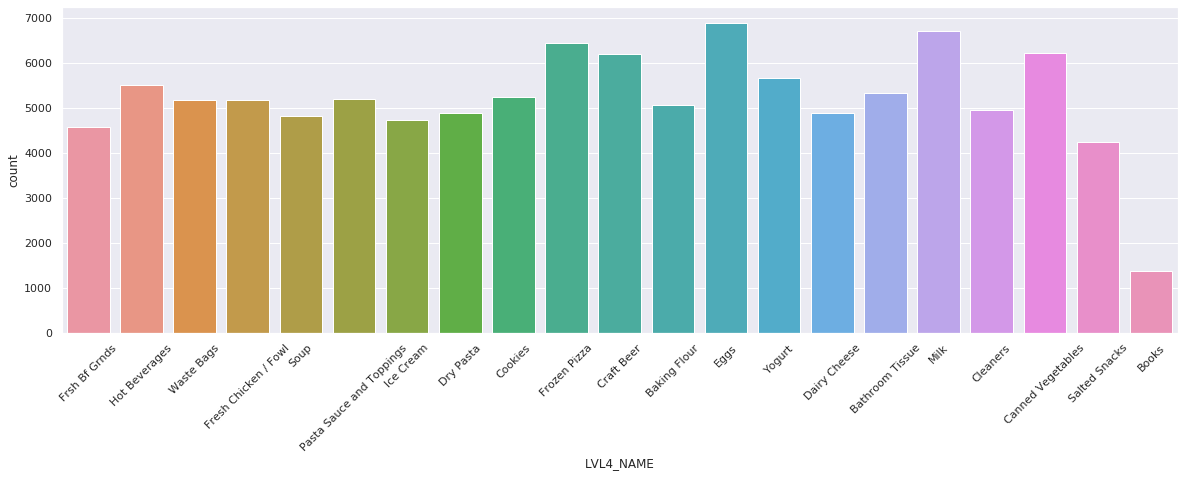

In [18]:
#M = summ_table.reset_index()
#sns.barplot(x='LVL4_NAME', y='TOTAL_UNITS', data=M)
plt.figure(figsize=(20,6))
sns.countplot(x="LVL4_NAME", data=data1)
plt.xticks(rotation=45)

The most sold category is Eggs followed by Milk as expected. Books is the category that is less sold which is also expected since customers can read their book digitally. The most bought unit is Eggs

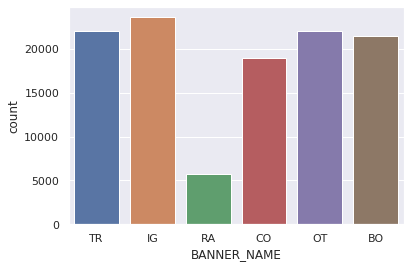

In [19]:
sns.countplot(x='BANNER_NAME', data=df1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

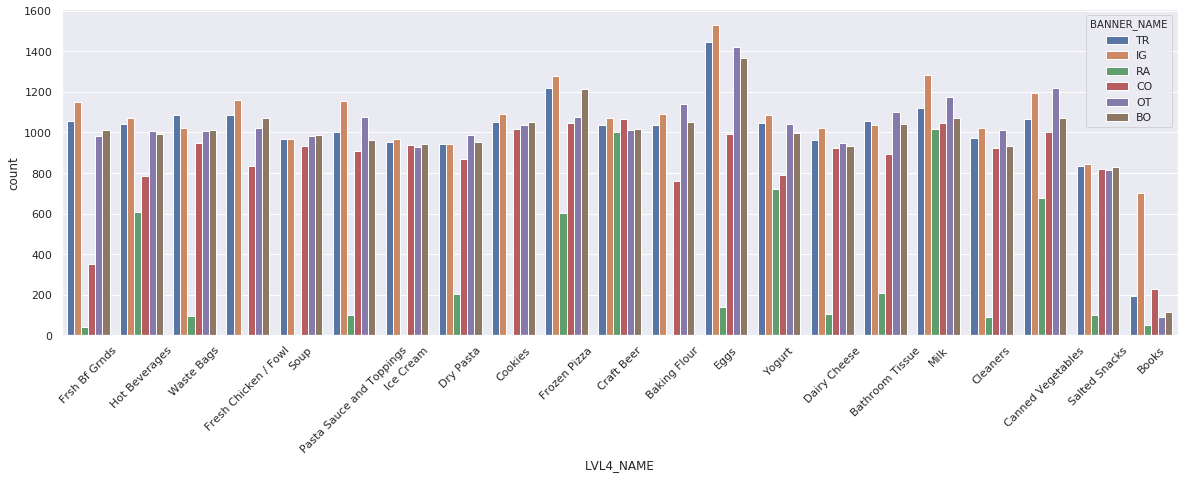

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x='LVL4_NAME', data=data1, hue='BANNER_NAME')
plt.xticks(rotation=45)

The most sold banner is IG

In [ ]:
#dummies = []
#cols = ['Sex','Embarked','Pclass']
#for col in cols:
    #dummies.append(pd.get_dummies(train[col]))
    
#dummies_df = pd.concat(dummies,axis=1)
#dummies_df.head()

In [198]:
#freq_table.FREQ = freq_table.FREQ.astype('float')
#freq_table.corr()
#there is a strong (linear)correlation between category sold and quantity 

In [199]:
#sns.lmplot(x='FREQ', y='TOTAL_UNITS', data=freq_table)

In [27]:
df1.WEEK.unique()

array([36,  4, 47, 48, 49, 50, 51, 52,  1,  2,  3,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46])

In [213]:
x = df1.YEAR_WK.unique()
x=np.sort(x)
xticks = [ float(i) for i in x]

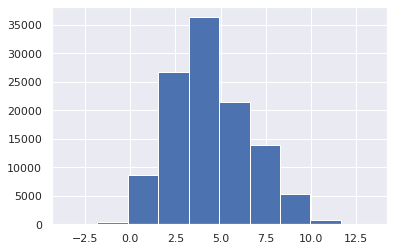

In [210]:
#LOG_UNITS
df1.LOG_UNITS.hist()

In [202]:
data1.YEAR_WK = data1.YEAR_WK.astype('int')

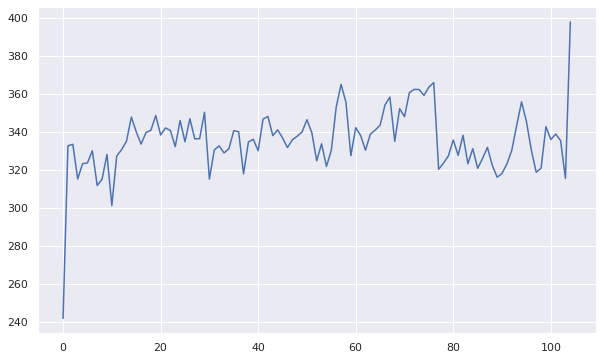

105


In [215]:
#M = data1[['YEAR_WK','LOG_UNITS','SOLD_CAT']]
M = data1[['YEAR_WK','LOG_UNITS','SOLD_CAT']].groupby(by=['YEAR_WK','SOLD_CAT']).sum().reset_index()
M = M.sort_values(by='YEAR_WK')
MM = M.query("SOLD_CAT=='Eggs'")
#f, ax = plt.subplots(figsize=(20, 6))
#g=sns.lineplot(x=np.arange(MM.shape[0]),y='LOG_UNITS', data=MM)
plt.figure(figsize=(10,6))
plt.plot(np.arange(105),MM['LOG_UNITS'].values)
#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
#ax.set_xlim([0,105])
#plt.xticks([])
#plt.xticks(xticks)
plt.show()
#plt.xticks(range(MM.shape[0]), xticks, rotation='vertical')
#ax.legend('')
#g.set_xticks(range(MM.shape[0]))
#g.set_xticklabels(xticks)
#print(xticks)
print(len(MM['LOG_UNITS']))

In [193]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113886 entries, 0 to 113885
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITEM_NO            113886 non-null  int64  
 1   GROUP_ID           113886 non-null  object 
 2   YEAR_WK            113886 non-null  int64  
 3   BANNER_NAME        113886 non-null  object 
 4   POSITION_ON_FLYER  113886 non-null  object 
 5   KG_FLAG            113886 non-null  int64  
 6   NET_PRICE          113886 non-null  float64
 7   HOLIDAY            31616 non-null   object 
 8   LOG_UNITS          113886 non-null  float64
 9   DISTRIBUTION       113886 non-null  float64
 10  UNITS_WEIGHT_SOLD  113886 non-null  float64
 11  LOG_NET_PRICE      113886 non-null  float64
 12  WEEK               113886 non-null  int64  
 13  SOLD_CAT           109443 non-null  object 
dtypes: float64(5), int64(4), object(5)
memory usage: 18.0+ MB


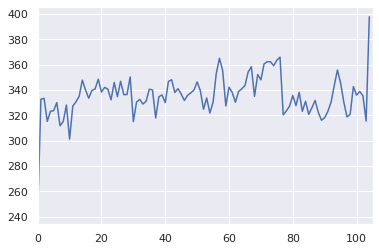

In [189]:
X=MM.reset_index(drop=True)
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()

ax.plot(X['LOG_UNITS'])
ax.set_xlim([0,105])
#ax.xaxis.set_major_locator(MaxNLocator(integer=False))

plt.show()
#plt.xticks(range(150),xticks)
#plt.xticks()

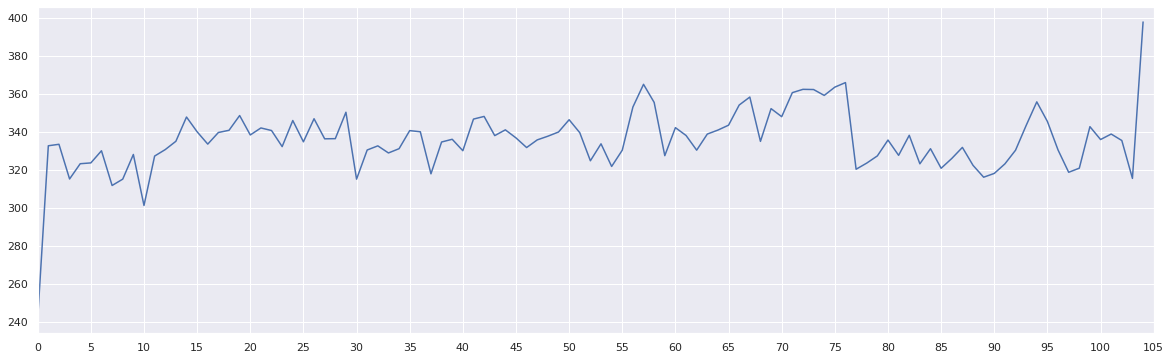

In [219]:
import matplotlib.ticker as plticker

x = np.arange(105)
y = X['LOG_UNITS'].values
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x,y)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlim([0,105])
plt.show()

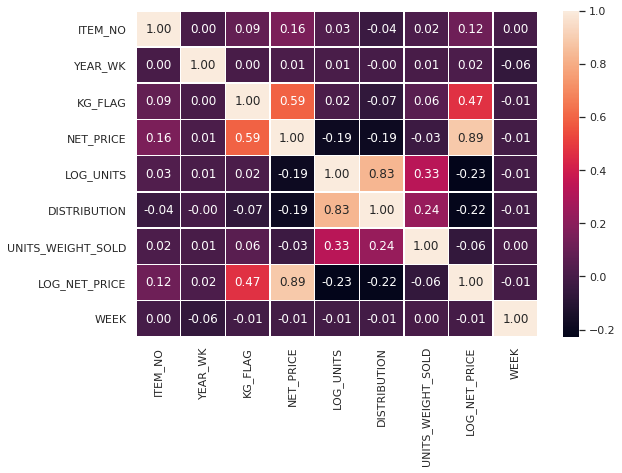

In [16]:
#cor_mat = join_data[['KG_FLAG','LOG_UNITS','DISTRIBUTION','LOG_NET_PRICE','WEEK','CROSS_EFFECT_LOG_PRICE']].corr()
cor_mat = df1.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cor_mat, annot=True, fmt=".2f", linewidths=.5, ax=ax)

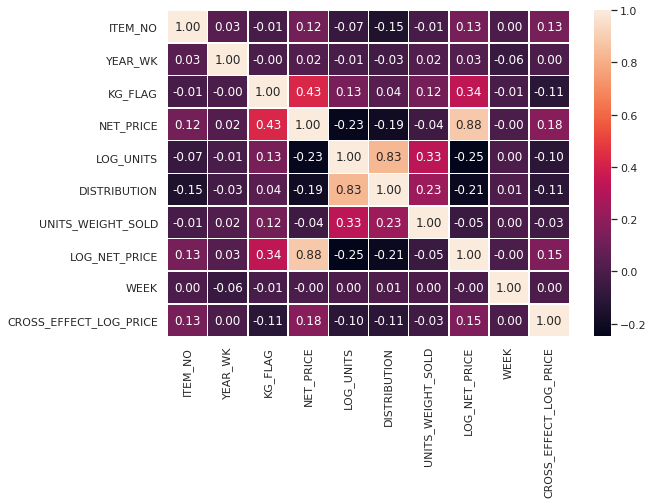

In [17]:
cor_mat2 = join_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cor_mat2, annot=True, fmt=".2f", linewidths=.5, ax=ax)

There is a strong correlation between quantity sold and distribution <br>
Intersting there is not correlation between price and quatity sold. Intuitively, one might thing the 
correlation may exists since (maybe) customers will tend to go for less expensive item. But this proves that what is concern food, price does not matter for customers<br>
Let see what are the items that are bought the most within the observation period

In [45]:
weekly_summ = df1.groupby(by=["YEAR_WK", "ITEM_NO"]).agg(FREQ=("ITEM_NO","count"),TOTAL_UNITS=("LOG_UNITS","sum")).reset_index()
weekly_summ = pd.merge(weekly_summ, df3, how='left', on="ITEM_NO")
weekly_summ.head()

,YEAR_WK,ITEM_NO,FREQ,TOTAL_UNITS,LVL4_NAME
0,201846,210172,3,7.780721,Cleaners
1,201846,349913,3,5.298317,Hot Beverages
2,201846,352173,4,14.109847,Eggs
3,201846,368773,5,14.632167,Fresh Chicken / Fowl
4,201846,408014,5,11.619769,Hot Beverages


In [47]:
data2 = weekly_summ.groupby(by=['YEAR_WK','LVL4_NAME']).agg({'FREQ':'sum'}).reset_index()
data2

,YEAR_WK,LVL4_NAME,FREQ
0,201846,Baking Flour,27
1,201846,Bathroom Tissue,38
2,201846,Books,11
3,201846,Canned Vegetables,52
4,201846,Cleaners,27
...,...,...,...
2200,202046,Pasta Sauce and Toppings,56
2201,202046,Salted Snacks,43
2202,202046,Soup,48
2203,202046,Waste Bags,49


<Figure size 720x720 with 0 Axes>

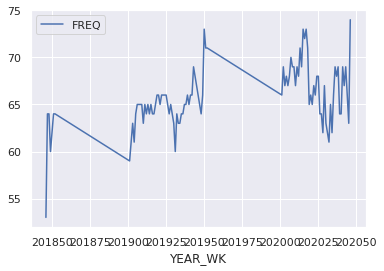

In [51]:
plt.figure(figsize=(10,10))
data2[data2['LVL4_NAME']=='Eggs'].plot(x='YEAR_WK', y='FREQ')

In [20]:
weekly_summ2 = df1.groupby(by=["YEAR_WK", "ITEM_NO", "BANNER_NAME"]).agg(FREQ=("ITEM_NO","count"),TOTAL_UNITS=("LOG_UNITS","sum")).reset_index()
weekly_summ2 = pd.merge(weekly_summ2, df3, how='left', on="ITEM_NO")
weekly_summ2.head()

,YEAR_WK,ITEM_NO,BANNER_NAME,FREQ,TOTAL_UNITS,LVL4_NAME
0,201846,210172,CO,1,2.639057,Cleaners
1,201846,210172,OT,1,2.197225,Cleaners
2,201846,210172,TR,1,2.944439,Cleaners
3,201846,349913,OT,1,1.386294,Hot Beverages
4,201846,349913,RA,1,1.609438,Hot Beverages


In [21]:
weekly_summ2.BANNER_NAME.value_counts()

IG    23625
OT    22060
TR    22055
BO    21449
CO    18924
RA     5773
Name: BANNER_NAME, dtype: int64

In [23]:
data = df1.groupby(by=["YEAR_WK","BANNER_NAME"]).agg(FREQ=("BANNER_NAME","count"),TOTAL_UNITS=("LOG_UNITS","sum")).reset_index()
data.head(6)

,YEAR_WK,BANNER_NAME,FREQ,TOTAL_UNITS
0,201846,BO,144,486.574677
1,201846,CO,83,151.582292
2,201846,IG,168,1005.502433
3,201846,OT,130,369.953730
4,201846,RA,38,77.218136
5,201846,TR,146,603.201798


<Figure size 1440x2880 with 0 Axes>

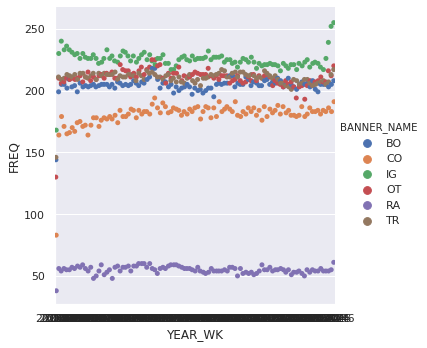

In [34]:
plt.figure(figsize=(20,40))
sns.catplot(x='YEAR_WK', y='FREQ', data=data, hue='BANNER_NAME')

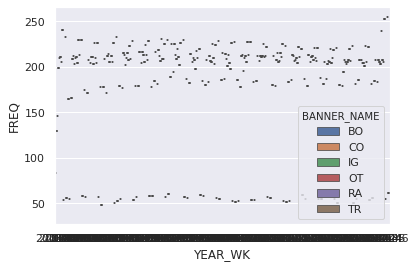

In [36]:
#sns.barplot(x='YEAR_WK', y='FREQ', data=data, hue='BANNER_NAME')
sns.boxplot(x='YEAR_WK', y='FREQ', data=data, hue='BANNER_NAME')

With respect to ITEM_NO, the most sold item within the period of observation is the Canned Vegetables and followed closely by Frozen Pizza<br> However the most units sold is the fresh chicken/Fowl<br>
However with respect to LVL4_NAME, the most sold is Bathroom Tissue (maybe because of COVID19 between March-April) :) <br>
6% of items (the top 29 items) represent 50% of sale..maybe these are the items that usually in front page or if not then these more effort should be concentrentated  

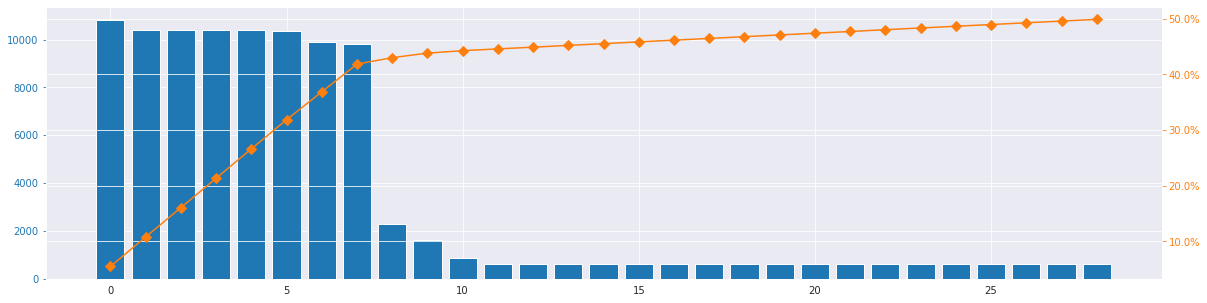

In [21]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(tbl1.index, tbl1['FREQ'], color="C0")
ax2 = ax.twinx()
ax2.plot(tbl1.index, tbl1['CUM_PCT'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

Given the item we have, the prices dont contribute in sale as shown ealier<br>
What are the single max units sold every week?<br>
what is the banner name, position of flyer?<br>
Are they sold more in holiday?<br>
Is there a noticeable distribution?

In [30]:
max_item_sold_year_wk = join_data.loc[join_data.groupby("YEAR_WK")["LOG_UNITS"].idxmax()] 
max_item_sold_year_wk = pd.merge(max_item_sold_year_wk, df3, how='left', on=["ITEM_NO"]).sort_values(by="YEAR_WK")
max_item_sold_year_wk.head()

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,LVL4_NAME
0,4387734,IG4387734,201846,IG,FRONT,0,3.497246,NaN,10.733632,0.983051,45873.000,1.251976,46,NaN,NaN,Eggs
1,3152603,IG3152603,201847,IG,FRONT,0,0.499805,NaN,11.860076,0.993220,141503.000,-0.693538,47,NaN,NaN,Soup
2,4387734,IG4387734,201848,IG,FRONT,0,3.483502,Good Friday,11.518937,0.986441,100603.000,1.248038,48,NaN,NaN,Eggs
3,4317784,IG4317784,201849,IG,FRONT,0,2.990165,NaN,10.791646,0.986441,48613.000,1.095328,49,NaN,NaN,Dairy Cheese
4,1203681,IG1203681,201850,IG,FRONT,1,5.950580,NaN,12.214549,0.881356,201702.379,1.783489,50,NaN,NaN,Frsh Bf Grnds


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

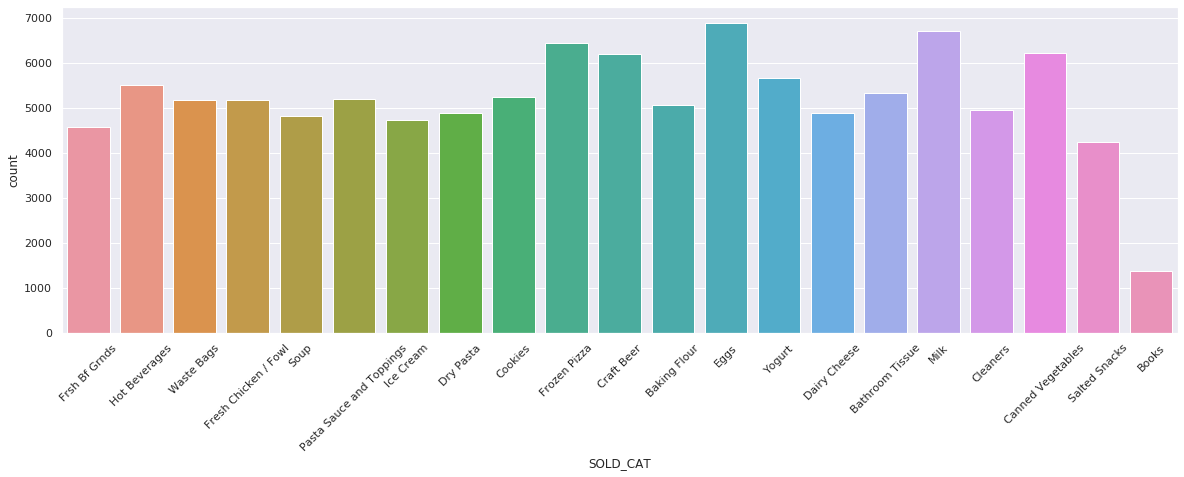

In [50]:
#max_item_sold_year_wk.ITEM_NO.value_counts()
#max_item_sold_year_wk.ITEM_NO.unique()
plt.figure(figsize=(20,6))
sns.countplot(x="SOLD_CAT", data=data1)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

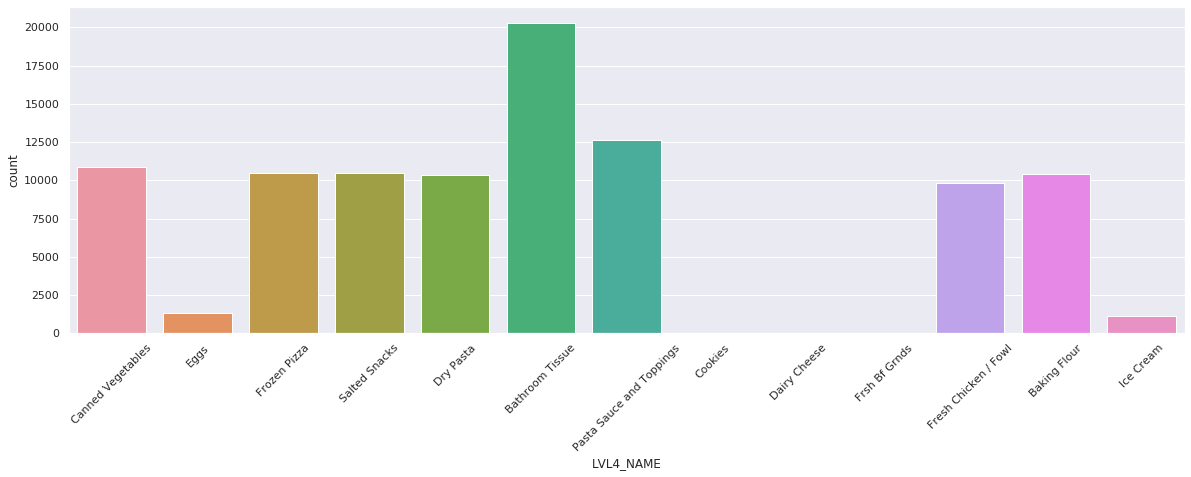

In [51]:
plt.figure(figsize=(20,6))
sns.countplot(x="LVL4_NAME", data=data2)
plt.xticks(rotation=45)

In [64]:
#data2.head()
hal = data2.loc[data2.CROSS_EFFECT_TYPE.str.contains('HALO', regex=False)==True]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

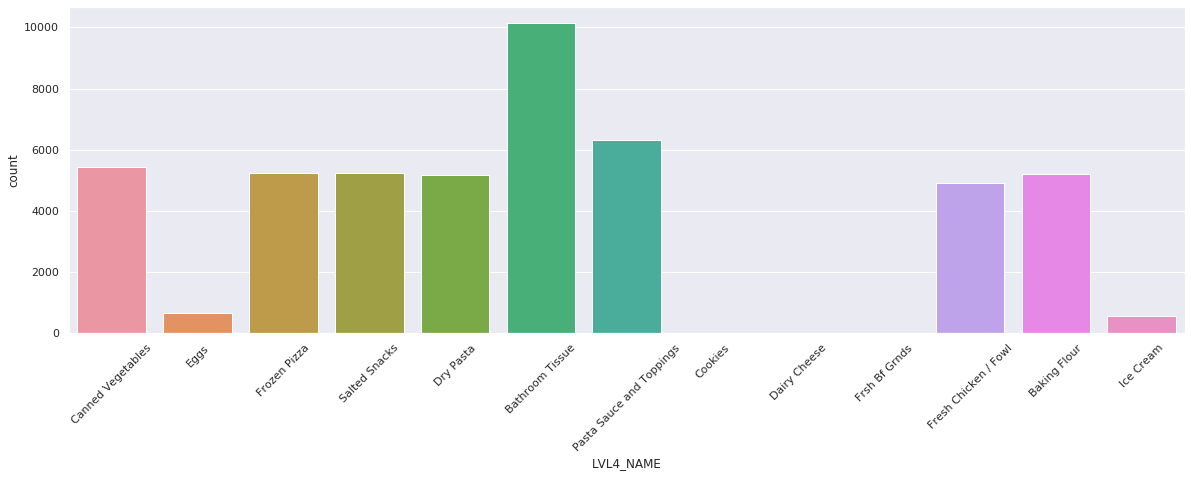

In [65]:
plt.figure(figsize=(20,6))
sns.countplot(x="LVL4_NAME", data=hal)
plt.xticks(rotation=45)

In 105 weeks, 4387734 is the most sold in 67 weeks<br>
Eggs is most sold item in a week 64% the most sold item in a week. But it is not the most sold item within the observation

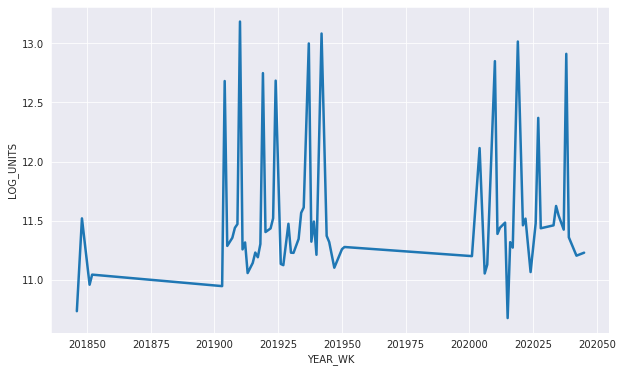

In [52]:
tmp = max_item_sold_year_wk.query("ITEM_NO==4387734")#.sort_values(by="LOG_UNITS", ascending=False)
plt.figure(figsize=(10,6))
sns.lineplot(x='YEAR_WK', y='LOG_UNITS', data=tmp, palette="tab10", linewidth=2.5)

In [83]:
#df1.query("ITEM_NO==4907644").sort_values(by="YEAR_WK")
#the most units sold in a week
tmp = join_data.groupby(by=["YEAR_WK","ITEM_NO"]).agg(TOTAL_UNITS=("LOG_UNITS","sum")).sort_values(by="YEAR_WK").reset_index()
x = tmp.loc[tmp.groupby("YEAR_WK")["TOTAL_UNITS"].idxmax()]
x.head()
#join_data['ITEM_NO'].value_counts()
#max_item_sold_year_wk.groupby(by="ITEM_NO").agg(FREQ=("ITEM_NO","count")).sort_values(by="FREQ", ascending=False).reset_index()

array([4907644, 2835262])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

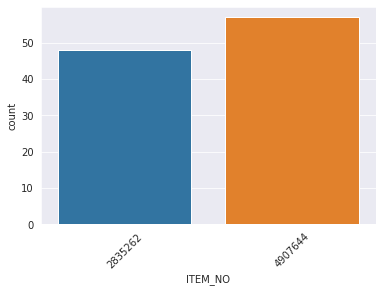

In [82]:
sns.countplot(x="ITEM_NO", data=x)
plt.xticks(rotation=45)
#max_item_sold_year_wk.DISTRIBUTION.value_counts()

In [86]:
join_data.groupby(by=["YEAR_WK","ITEM_NO"]).agg(FREQ=("ITEM_NO","count"),TOTAL_UNITS=("LOG_UNITS","sum")).sort_values(by="YEAR_WK").reset_index()

,YEAR_WK,ITEM_NO,FREQ,TOTAL_UNITS
0,201846,210172,3,7.780721
1,201846,4672944,4,14.628891
2,201846,4762174,4,16.729229
3,201846,4769764,1,3.555348
4,201846,4804054,6,25.497704
...,...,...,...,...
25621,202046,3046973,2,7.564757
25622,202046,3024063,6,24.084011
25623,202046,3014063,6,30.261492
25624,202046,3099463,5,23.898194


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

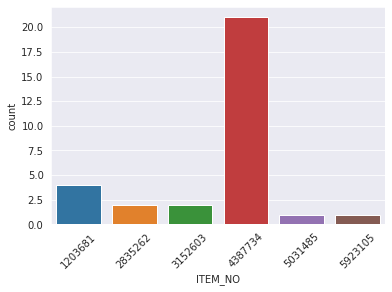

In [43]:
#max_item_sold_year_wk[max_item_sold_year_wk["HOLIDAY"].notna()]
on_holiday = max_item_sold_year_wk[max_item_sold_year_wk["HOLIDAY"].notna()]
sns.countplot(x="ITEM_NO", data=on_holiday)
plt.xticks(rotation=45)

In [129]:
min_item_sold_year_wk = join_data.loc[join_data.groupby("YEAR_WK")["LOG_UNITS"].idxmin()] 
min_item_sold_year_wk = pd.merge(min_item_sold_year_wk, df3, how='left', on=["ITEM_NO"]).sort_values(by="YEAR_WK")
min_item_sold_year_wk.head()

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,LVL4_NAME
0,6619646,OT6619646,201846,OT,FRONT,1,34.086540,NaN,-1.570217,0.008850,0.208,3.528903,46,NaN,NaN,NaN
1,2133872,TR2133872,201847,TR,FRONT,1,22.102273,NaN,-1.737271,0.013158,0.176,3.095680,47,NaN,NaN,Fresh Chicken / Fowl
2,5884175,OT5884175,201848,OT,FRONT,1,22.983607,NaN,-1.187443,0.008850,0.305,3.134781,48,NaN,NaN,Fresh Chicken / Fowl
3,2133872,BO2133872,201849,BO,FRONT,1,15.416666,NaN,-1.164752,0.014493,0.312,2.735449,49,NaN,NaN,Fresh Chicken / Fowl
4,5884175,OT5884175,201850,OT,FRONT,1,22.037035,NaN,-1.309333,0.008850,0.270,3.092724,50,NaN,NaN,Fresh Chicken / Fowl


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

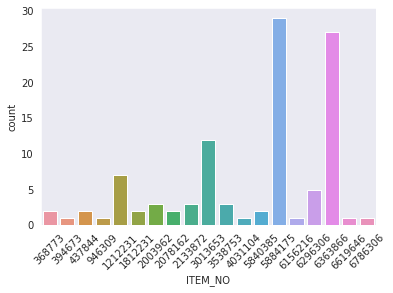

In [133]:
sns.countplot(x="ITEM_NO", data=min_item_sold_year_wk)
plt.xticks(rotation=45)
#

In [169]:
#min_item_sold_year_wk.YEAR_WK.unique()
#min_item_sold_year_wk.query("ITEM_NO==5884175")
freq_table =join_data.groupby(by="ITEM_NO").agg(FREQ=("ITEM_NO","count")).sort_values(by="FREQ", ascending=False).reset_index()
freq_table.reset_index()['FREQ'].sum()
freq_table['PCT'] = round((freq_table['FREQ']/freq_table['FREQ'].sum())*100,2)
freq_table
#join_data.loc[join_data["LOG_UNITS"].idxmax()] 

,ITEM_NO,FREQ,PCT
0,4907644,10820,5.49
1,3930573,10420,5.29
2,6107826,10420,5.29
3,4080874,10400,5.28
4,901569,10400,5.28
...,...,...,...
479,6728636,2,0.00
480,6720386,2,0.00
481,6718886,2,0.00
482,6680956,2,0.00


In [62]:
df3.query("ITEM_NO==2835262").head()
#max_item_sold_year_wk.YEAR_WK.unique()

,ITEM_NO,LVL4_NAME
184,2835262,Fresh Chicken / Fowl


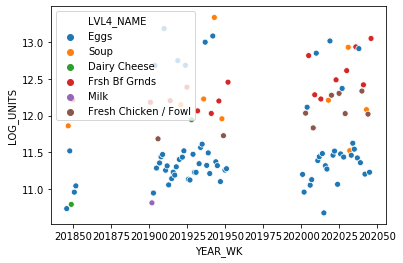

In [114]:
sns.scatterplot(x="YEAR_WK", y="LOG_UNITS", hue="LVL4_NAME", data=max_item_sold_year_wk)

In [110]:
df1.query("YEAR_WK==201846")['LOG_UNITS'].min()

-1.5702172140000001

In [24]:
data2.query("LVL4_NAME=='Bathroom Tissue'")
#Since we dont know which item was bought with, we only require the cross_effect_log_price a

,GROUP_ID,YEAR_WK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,BANNER_NAME,ITEM_NO,LVL4_NAME
21780,OT3686053,201847.0,HALO_ITEM_LOG_PRICE_01,0.000000,OT,3686053.0,Bathroom Tissue
21781,OT3686053,201847.0,HALO_ITEM_LOG_PRICE_02,1.274744,OT,3686053.0,Bathroom Tissue
21782,OT3686053,201847.0,HALO_ITEM_LOG_PRICE_03,2.061170,OT,3686053.0,Bathroom Tissue
21783,OT3686053,201847.0,HALO_ITEM_LOG_PRICE_04,2.861629,OT,3686053.0,Bathroom Tissue
21784,OT3686053,201847.0,HALO_ITEM_LOG_PRICE_05,2.039921,OT,3686053.0,Bathroom Tissue
...,...,...,...,...,...,...,...
96275,IG4080874,202046.0,CANNIB_ITEM_LOG_PRICE_06,0.000000,IG,4080874.0,Bathroom Tissue
96276,IG4080874,202046.0,CANNIB_ITEM_LOG_PRICE_07,0.000000,IG,4080874.0,Bathroom Tissue
96277,IG4080874,202046.0,CANNIB_ITEM_LOG_PRICE_08,0.000000,IG,4080874.0,Bathroom Tissue
96278,IG4080874,202046.0,CANNIB_ITEM_LOG_PRICE_09,0.000000,IG,4080874.0,Bathroom Tissue


In [25]:
data3.head()

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,LVL4_NAME_x,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,LVL4_NAME_y
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_01,0.0,Frsh Bf Grnds
1,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_02,0.0,Frsh Bf Grnds
2,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_03,0.0,Frsh Bf Grnds
3,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_04,0.0,Frsh Bf Grnds
4,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,Frsh Bf Grnds,HALO_ITEM_LOG_PRICE_05,0.0,Frsh Bf Grnds


In [27]:
clean_df2 = df2.query("CROSS_EFFECT_LOG_PRICE!=0")
clean_df2.head()

,GROUP_ID,YEAR_WK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE,BANNER_NAME,ITEM_NO
0,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_01,1.075020,TR,4907644.0
1,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_02,0.916291,TR,4907644.0
3,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_04,1.341123,TR,4907644.0
4,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_05,0.733477,TR,4907644.0
5,TR4907644,201846.0,HALO_ITEM_LOG_PRICE_06,1.172846,TR,4907644.0


In [72]:
clean_data = pd.merge(df1, clean_df2, how='left', on=['YEAR_WK', 'BANNER_NAME', 'ITEM_NO', 'GROUP_ID'])
clean_data.head()

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,NaN,NaN
1,6156216,TR6156216,202004,TR,FRONT,1,9.891305,NaN,-0.776529,0.013158,0.46,2.291656,4,NaN,NaN
2,2669722,IG2669722,201847,IG,FRONT,0,3.934955,NaN,6.104793,0.674576,448.00,1.369900,47,NaN,NaN
3,2669722,IG2669722,201848,IG,FRONT,0,3.975193,Good Friday,5.963579,0.633898,389.00,1.380073,48,NaN,NaN
4,2669722,IG2669722,201849,IG,FRONT,0,3.490547,NaN,6.817831,0.823729,914.00,1.250058,49,NaN,NaN


In [73]:
clean_data.query("ITEM_NO==6156216")

,ITEM_NO,GROUP_ID,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,NET_PRICE,HOLIDAY,LOG_UNITS,DISTRIBUTION,UNITS_WEIGHT_SOLD,LOG_NET_PRICE,WEEK,CROSS_EFFECT_TYPE,CROSS_EFFECT_LOG_PRICE
0,6156216,TR6156216,201936,TR,FRONT,1,9.916667,NaN,-2.120264,0.013158,0.12,2.294217,36,NaN,NaN
1,6156216,TR6156216,202004,TR,FRONT,1,9.891305,NaN,-0.776529,0.013158,0.46,2.291656,4,NaN,NaN


In [74]:
train_data = clean_data.drop(['GROUP_ID','NET_PRICE', 'UNITS_WEIGHT_SOLD', 'CROSS_EFFECT_TYPE'], axis=1)
train_data.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,CROSS_EFFECT_LOG_PRICE
0,6156216,201936,TR,FRONT,1,NaN,-2.120264,0.013158,2.294217,36,NaN
1,6156216,202004,TR,FRONT,1,NaN,-0.776529,0.013158,2.291656,4,NaN
2,2669722,201847,IG,FRONT,0,NaN,6.104793,0.674576,1.369900,47,NaN
3,2669722,201848,IG,FRONT,0,Good Friday,5.963579,0.633898,1.380073,48,NaN
4,2669722,201849,IG,FRONT,0,NaN,6.817831,0.823729,1.250058,49,NaN


In [75]:
train_data.HOLIDAY.unique()
#some item are bought more for a given holiday. But we have 20 holidays so...it is too much.
#for now  we just ignore the individual holiday effect and maps 0 non holiday and 1 holiday

array([nan, 'Good Friday', 'Easter_Monday', 'Mothers_Day', 'Victoria Day',
       'Stanley_Cup_Final', 'Fathers_Day', 'Canada Day',
       'Civic Holiday (Not for all)', 'Labor Day', 'Thanksgiving',
       'Halloween', 'Grey_Cup', 'Christmas / Boxing', 'New year',
       'Chinese_New_Year', 'Family Day', 'Academy_Awards', 'St_Patricks',
       'Super_Bowl', 'Valentines'], dtype=object)

In [76]:
train_data.ITEM_NO.notna().sum()
#notna, notnull(), isnull

147330

In [77]:
train_data.loc[train_data.HOLIDAY.notnull()==True, 'HOLIDAY1'] = 1
train_data.loc[train_data.HOLIDAY.notnull()==False, 'HOLIDAY1'] = 0
train_data.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,CROSS_EFFECT_LOG_PRICE,HOLIDAY1
0,6156216,201936,TR,FRONT,1,NaN,-2.120264,0.013158,2.294217,36,NaN,0.0
1,6156216,202004,TR,FRONT,1,NaN,-0.776529,0.013158,2.291656,4,NaN,0.0
2,2669722,201847,IG,FRONT,0,NaN,6.104793,0.674576,1.369900,47,NaN,0.0
3,2669722,201848,IG,FRONT,0,Good Friday,5.963579,0.633898,1.380073,48,NaN,1.0
4,2669722,201849,IG,FRONT,0,NaN,6.817831,0.823729,1.250058,49,NaN,0.0


In [78]:
train_data.fillna(0, inplace=True)

In [79]:
train_data.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,CROSS_EFFECT_LOG_PRICE,HOLIDAY1
0,6156216,201936,TR,FRONT,1,0,-2.120264,0.013158,2.294217,36,0.0,0.0
1,6156216,202004,TR,FRONT,1,0,-0.776529,0.013158,2.291656,4,0.0,0.0
2,2669722,201847,IG,FRONT,0,0,6.104793,0.674576,1.369900,47,0.0,0.0
3,2669722,201848,IG,FRONT,0,Good Friday,5.963579,0.633898,1.380073,48,0.0,1.0
4,2669722,201849,IG,FRONT,0,0,6.817831,0.823729,1.250058,49,0.0,0.0


In [80]:
train_data.WEEK.unique()

array([36,  4, 47, 48, 49, 50, 51, 52,  1,  2,  3,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46])

In [115]:
import datetime
d = "201305"
r = datetime.datetime.strptime(d + '-1', "%Y%W-%w")
train_data['Date'] = train_data['YEAR_WK'].apply(lambda d: datetime.datetime.strptime(str(d) + '-1', "%Y%W-%w"))
#r = datetime.datetime.strptime(d + '-1', '%G%V-%u'
train_data.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,CROSS_EFFECT_LOG_PRICE,HOLIDAY1,Date
0,6156216,201936,TR,FRONT,1,0.0,-2.120264,0.013158,2.294217,36,0.0,0.0,2019-09-09
1,6156216,202004,TR,FRONT,1,0.0,-0.776529,0.013158,2.291656,4,0.0,0.0,2020-01-27
2,2669722,201847,IG,FRONT,0,0.0,6.104793,0.674576,1.369900,47,0.0,0.0,2018-11-19
3,2669722,201848,IG,FRONT,0,1.0,5.963579,0.633898,1.380073,48,0.0,1.0,2018-11-26
4,2669722,201849,IG,FRONT,0,0.0,6.817831,0.823729,1.250058,49,0.0,0.0,2018-12-03


In [116]:
mappings = dict(zip(train_data.loc[train_data.HOLIDAY!=0]['HOLIDAY'].unique(),np.ones(20)))
train_data.HOLIDAY.replace(mappings, inplace=True)

In [117]:
train_data.head(10)

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,CROSS_EFFECT_LOG_PRICE,HOLIDAY1,Date
0,6156216,201936,TR,FRONT,1,0.0,-2.120264,0.013158,2.294217,36,0.0,0.0,2019-09-09
1,6156216,202004,TR,FRONT,1,0.0,-0.776529,0.013158,2.291656,4,0.0,0.0,2020-01-27
2,2669722,201847,IG,FRONT,0,0.0,6.104793,0.674576,1.369900,47,0.0,0.0,2018-11-19
3,2669722,201848,IG,FRONT,0,1.0,5.963579,0.633898,1.380073,48,0.0,1.0,2018-11-26
4,2669722,201849,IG,FRONT,0,0.0,6.817831,0.823729,1.250058,49,0.0,0.0,2018-12-03
5,2669722,201850,IG,FRONT,0,0.0,6.588926,0.772881,1.316611,50,0.0,0.0,2018-12-10
6,2669722,201851,IG,FRONT,0,1.0,6.492240,0.732203,1.316254,51,0.0,1.0,2018-12-17
7,2669722,201852,IG,FRONT,0,0.0,6.561031,0.732203,1.311596,52,0.0,0.0,2018-12-24
8,2669722,201901,IG,FRONT,0,0.0,6.359574,0.742373,1.316770,1,0.0,0.0,2019-01-07
9,2669722,201902,IG,FRONT,0,1.0,6.492240,0.745763,1.311971,2,0.0,1.0,2019-01-14


In [118]:
dummies = []
cols = ['BANNER_NAME','POSITION_ON_FLYER']
for col in cols:
    dummies.append(pd.get_dummies(train_data[col]))
    
dummies_df = pd.concat(dummies,axis=1)
#train_data = pd.concat([train_data,dummies_df], axis=1)
new_train_data = pd.concat([train_data,dummies_df], axis=1)
new_train_data.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,...,HOLIDAY1,Date,BO,CO,IG,OT,RA,TR,FRONT,No_Ad
0,6156216,201936,TR,FRONT,1,0.0,-2.120264,0.013158,2.294217,36,...,0.0,2019-09-09,0,0,0,0,0,1,1,0
1,6156216,202004,TR,FRONT,1,0.0,-0.776529,0.013158,2.291656,4,...,0.0,2020-01-27,0,0,0,0,0,1,1,0
2,2669722,201847,IG,FRONT,0,0.0,6.104793,0.674576,1.369900,47,...,0.0,2018-11-19,0,0,1,0,0,0,1,0
3,2669722,201848,IG,FRONT,0,1.0,5.963579,0.633898,1.380073,48,...,1.0,2018-11-26,0,0,1,0,0,0,1,0
4,2669722,201849,IG,FRONT,0,0.0,6.817831,0.823729,1.250058,49,...,0.0,2018-12-03,0,0,1,0,0,0,1,0


In [120]:
M = pd.merge(new_train_data, df3, how='left', on='ITEM_NO')
M.head()

,ITEM_NO,YEAR_WK,BANNER_NAME,POSITION_ON_FLYER,KG_FLAG,HOLIDAY,LOG_UNITS,DISTRIBUTION,LOG_NET_PRICE,WEEK,...,Date,BO,CO,IG,OT,RA,TR,FRONT,No_Ad,LVL4_NAME
0,6156216,201936,TR,FRONT,1,0.0,-2.120264,0.013158,2.294217,36,...,2019-09-09,0,0,0,0,0,1,1,0,Frsh Bf Grnds
1,6156216,202004,TR,FRONT,1,0.0,-0.776529,0.013158,2.291656,4,...,2020-01-27,0,0,0,0,0,1,1,0,Frsh Bf Grnds
2,2669722,201847,IG,FRONT,0,0.0,6.104793,0.674576,1.369900,47,...,2018-11-19,0,0,1,0,0,0,1,0,Hot Beverages
3,2669722,201848,IG,FRONT,0,1.0,5.963579,0.633898,1.380073,48,...,2018-11-26,0,0,1,0,0,0,1,0,Hot Beverages
4,2669722,201849,IG,FRONT,0,0.0,6.817831,0.823729,1.250058,49,...,2018-12-03,0,0,1,0,0,0,1,0,Hot Beverages


(737010.0, 737745.0)

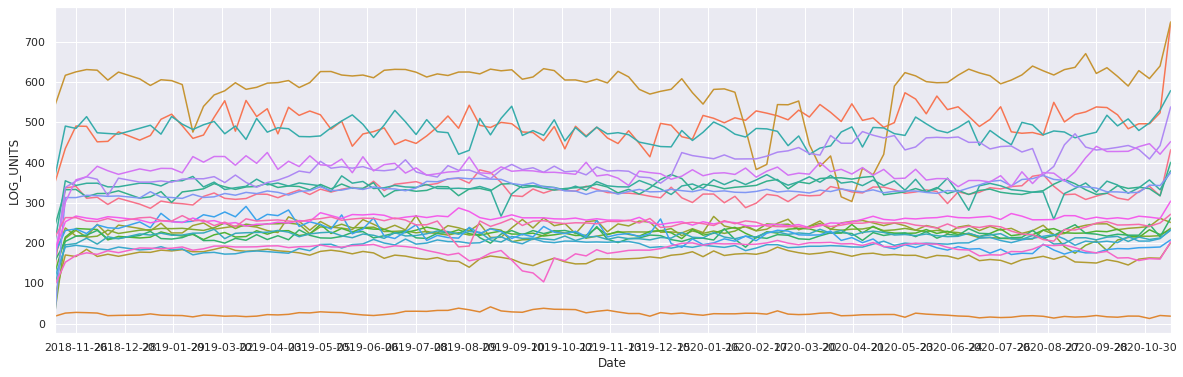

In [136]:
MM = M[['Date','LOG_UNITS','LVL4_NAME']].groupby(by=['Date','LVL4_NAME']).sum().reset_index()
import matplotlib.ticker as plticker
f, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x='Date',y='LOG_UNITS', data=MM, hue='LVL4_NAME',ax=ax, legend=False)
loc = plticker.MultipleLocator(base=32.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlim([MM['Date'].min(),MM['Date'].max()])
#ax.set_xticks(rotation=45)
#plt.show()

In [125]:
len(M.Date.unique())

105

In [ ]:
summ = data1.groupby(by=['N_YEAR_WK', 'LVL4_NAME']).agg(TOTAL_LOG_UNITS=('LOG_UNITS', 'sum')).reset_index()
f, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x='N_YEAR_WK', y='TOTAL_LOG_UNITS', data=summ, hue='LVL4_NAME', palette="tab10", linewidth=2.5, legend=False, ax=ax)